# Analyzing salary based on experience
## A simple linear regression analysis to analyse and predict salary for an employee given the years of experience

### Importing required libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the dataset

In [46]:
emp_data = pd.read_csv("salary_data.csv")
print("CSV data read successfully. First 5 lines of the data displayed below")
emp_data.head()

CSV data read successfully. First 5 lines of the data displayed below


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Summary statistics of both the variables

In [47]:
emp_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [48]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 544.0 bytes


### Scatter plot to determine whether there is any linear relationship between the given variables

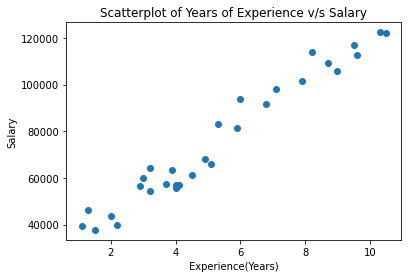

Correlation between the variables::


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [49]:
x_axis = emp_data["YearsExperience"]
y_axis = emp_data["Salary"]
plt.scatter(x_axis,y_axis)
plt.title("Scatterplot of Years of Experience v/s Salary")
plt.xlabel("Experience(Years)")
plt.ylabel("Salary")
plt.show()
print("Correlation between the variables::")
emp_data[["YearsExperience","Salary"]].corr()

### Defining the predictor and target variable

In [50]:
X = emp_data['YearsExperience'].values.reshape(-1,1)
Y = emp_data['Salary'].values.reshape(-1,1)

### Randomly splitting the data into training(70%) and test(30%) dataset

In [51]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.3, random_state=0) 

### Fitting the model

In [52]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression() #creating a linear regression constructor 
lm.fit(X_train, Y_train) 
print("Training complete.")

Training complete.


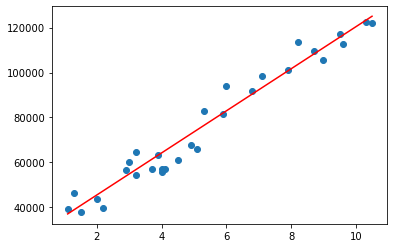

In [53]:
line = lm.coef_*X+lm.intercept_
plt.scatter(X, Y)
plt.plot(X, line,color="r");
plt.show()

### Finding the goodness of the fit

In [54]:
print("Predicting test data::")
print(X_test) 
Y_pred = lm.predict(X_test)

Predicting test data::
[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]]


#### Analysing actual and predicted values

In [55]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
df

,Actual,Predicted
0,37731.0,40817.783270
1,122391.0,123188.082589
2,57081.0,65154.462615
3,63218.0,63282.410357
4,116969.0,115699.873560
5,109431.0,108211.664531
6,112635.0,116635.899689
7,55794.0,64218.436486
8,83088.0,76386.776158


c:\users\lenovo\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

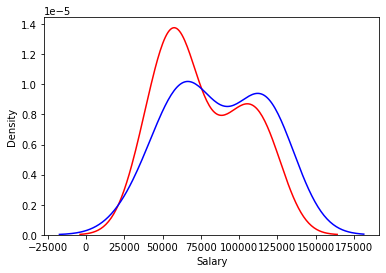

In [56]:
axl = sns.distplot(emp_data['Salary'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred, hist=False, color="b", label="Fitted Value", ax=axl)

### R-squared and mean absolute error

In [57]:
lm.fit(X,Y)
print("R-squared error:",lm.score(X,Y))
from sklearn import metrics
print("Mean absolute error:", metrics.mean_absolute_error(Y_test,Y_pred))

R-squared error: 0.9569566641435086
Mean absolute error: 3737.417861878896


In [58]:
import ipywidgets as widgets
a = widgets.FloatText(value=1.0,min=0.0,max=40.0,step=0.1,description='Exp. in years')
b = widgets.FloatSlider(value=1.0,min=0.0,max=40.0,step=0.1,description='Exp. in years')
display(a,b)
mylink = widgets.jslink((a, 'value'), (b, 'value'))

FloatText(value=1.0, description='Exp. in years', step=0.1)

FloatSlider(value=1.0, description='Exp. in years', max=40.0)

In [59]:
own_pred = lm.predict(np.array((b.value)).reshape(-1,1))
print("Years of experience = {}".format(b.value))
print("Predicted Salary = {}".format(own_pred[0]))

Years of experience = 1.0
Predicted Salary = [35242.16252012]
